# <center>Analysis of Happiness Across the World</center>

## <center>Spring 2025 Data Science Project</center>

#### Kimber Gonzalez Lopez, Christina Jung, Olade Kounou, Matthew Mueller, Franco Romero

##### Contributions

A: Project idea<br>
B: Dataset Curation and Preprocessing<br>
C: Data Exploration and Summary Statistics<br>
D: ML Algorithm Design/Development<br>
E: ML Algorithm Training and Test Data Analysis<br>
F: Visualization, Result Analysis, Conclusion<br>
G: Final Tutorial Report Creation<br>
H: Additional (not listed above)
- Kimber Gonzalez Lopez
    - D: ML Algorithm Design/Development
    - E: ML Algorithm Training and Test Data Analysis
- Christina Jung
    - A: Project Idea
    - B: Dataset Curation and Preprocessing
    - G: Final Tutorial Report Creation
- Olade Kounou
    - C: Dataset Exploration and Summary Statistics
    - F: Visualization, Result Analysis, Conclusion
- Matthew Mueller
    - C: Dataset Exploration and Summary Statistics
    - F: Visualization, Result Analysis, Conclusion
- Franco Romero
    - B: Dataset Curation and Preprocessing
    - C: Dataset Exploration and Summary Statistics
    - G: Final Tutorial Report Creation

## Table of Contents
- [Introduction](#introduction)
- [Data Curation](#data-curation)
    - [Source and Explanation](#source-and-explanation)
    - [Imports](#imports)
    - [Parsing and Organizing](#parsing-and-organizing)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [First Hypothesis](#first-hypothesis)
    - [Second Hypothesis](#second-hypothesis)
    - [Third Hypothesis](#third-hypothesis)
    - [Fourth Hypothesis](#fourth-hypothesis)
- [Primary Analysis](#primary-analysis)
    - [Feature Engineering](#feature-engineering)
    - [Training and Testing Linear Regression Model](#training-and-testing-linear-regression-model)
    - [Training and Testing Random Forest Model](#training-and-testing-random-forest-model)
        - [Feature Importances](#feature-importances)
- [Visualization](#visualization)
- [Insights and Conclusions](#insights-and-conclusions)

## Introduction <a id='introduction'></a>

## Data Curation <a id='data-curation'></a>

### Source and Explanation <a id='source-and-explanation'></a>

We used the [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness) dataset. This dataset is based on Gallup World Poll data from 2015 to 2019 from 170 countries, ranking each country by happiness score using the Cantril ladder. The Cantril ladder asks the respondent to rate their current life out of 10 where the best possible life is a 10 and the worst possible life is a 0. The values of each of the six factors (GDP per capita, social support, healthy life expectancy, freedom, perceptions of corruption, and generosity) are estimates of the extent that the given factor contributes to the happiness score. By the end of the parsing and organizing, the columns we are left with are:
- Country
- Region
- Happiness Score
- GDP per Capita
- Social Support
- Healthy Life Expectancy
- Freedom
- Perceptions of Corruption
- Generosity
- Year     

### Imports <a id='imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Parsing and Organizing <a id='parsing-and-organizing'></a>

First, we load in each DataFrame and check their shapes and columns.

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

df_years = [(df_2015, 2015), (df_2016, 2016), (df_2017, 2017), (df_2018, 2018), (df_2019, 2019)]

# Check the shape and columns of each DataFrame
for df, year in df_years:
    print(f"DataFrame for {year}:")
    print(df.shape)
    print(df.columns)

DataFrame for 2015:
(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
DataFrame for 2016:
(157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
DataFrame for 2017:
(155, 12)
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
DataFrame for 2018:
(156, 9)
Index(['Overall

We see that the columns are not consistent across each DataFrame, so we need to standardize the columns across the years.

In [3]:
new_columns = ['Country', 'Region', 'Happiness_Score', 'GDP_per_Capita',
               'Social_Support', 'Healthy_Life_Expectancy', 'Freedom',
               'Perceptions_of_Corruption', 'Generosity', 'Year']

new_columns_missing_region = ['Country', 'Happiness_Score', 'GDP_per_Capita',
                        'Social_Support', 'Healthy_Life_Expectancy', 'Freedom',
                        'Perceptions_of_Corruption', 'Generosity', 'Year', 'Region']

# 2015
df_2015_clean = df_2015[['Country', 'Region', 'Happiness Score',
                        'Economy (GDP per Capita)', 'Family',
                        'Health (Life Expectancy)', 'Freedom',
                        'Trust (Government Corruption)', 'Generosity']].copy()
df_2015_clean['Year'] = 2015
df_2015_clean.columns = new_columns

# 2016
df_2016_clean = df_2016[['Country', 'Region', 'Happiness Score',
                        'Economy (GDP per Capita)', 'Family',
                        'Health (Life Expectancy)', 'Freedom',
                        'Trust (Government Corruption)', 'Generosity']].copy()
df_2016_clean['Year'] = 2016
df_2016_clean.columns = new_columns

# 2017
df_2017_clean = df_2017[['Country', 'Happiness.Score',
                        'Economy..GDP.per.Capita.', 'Family',
                        'Health..Life.Expectancy.', 'Freedom',
                        'Trust..Government.Corruption.', 'Generosity']].copy()
df_2017_clean['Year'] = 2017
df_2017_clean['Region'] = pd.NA  # Missing in 2017 dataset
df_2017_clean.columns = new_columns_missing_region

# 2018
df_2018_clean = df_2018[['Country or region', 'Score',
                        'GDP per capita', 'Social support',
                        'Healthy life expectancy', 'Freedom to make life choices',
                        'Generosity', 'Perceptions of corruption']].copy()
df_2018_clean['Year'] = 2018
df_2018_clean['Region'] = pd.NA  # Missing in 2018 dataset
df_2018_clean.columns = new_columns_missing_region

# 2019
df_2019_clean = df_2019[['Country or region', 'Score',
                        'GDP per capita', 'Social support',
                        'Healthy life expectancy', 'Freedom to make life choices',
                        'Generosity', 'Perceptions of corruption']].copy()
df_2019_clean['Year'] = 2019
df_2019_clean['Region'] = pd.NA  # Missing in 2019 dataset
df_2019_clean.columns = new_columns_missing_region

# Combine all datasets
happiness_df = pd.concat([df_2015_clean, df_2016_clean, df_2017_clean,
                        df_2018_clean, df_2019_clean], ignore_index=True)

# Fill missing regions by looking up countries in other years
for country in happiness_df[happiness_df['Region'].isna()]['Country'].unique():
    region = happiness_df[(happiness_df['Country'] == country) &
                         (happiness_df['Region'].notna())]['Region'].unique()
    if len(region) > 0:
        happiness_df.loc[(happiness_df['Country'] == country) &
                        (happiness_df['Region'].isna()), 'Region'] = region[0]

# Check for duplicates
print("Duplicates:", happiness_df.duplicated().sum())

# Check for missing values
happiness_df.isna().sum()

Duplicates: 0


Country                      0
Region                       8
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Perceptions_of_Corruption    0
Generosity                   1
Year                         0
dtype: int64

We see that eight countries are still missing regions, and one country is missing generosity. As a result, we will first identify the missing values, and attempt to fill them in manually.

In [4]:
# Look at the available regions to fill in for missing values later
unique_regions = happiness_df['Region'].unique()
print(unique_regions.tolist())

missing_values = happiness_df[happiness_df.isna().any(axis=1)]
missing_values[['Country', 'Region', 'Generosity', 'Year']]

['Western Europe', 'North America', 'Australia and New Zealand', 'Middle East and Northern Africa', 'Latin America and Caribbean', 'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia', 'Sub-Saharan Africa', 'Southern Asia', nan]


,Country,Region,Generosity,Year
347,Taiwan Province of China,NaN,0.258360,2017
385,"Hong Kong S.A.R., China",NaN,0.374466,2017
489,United Arab Emirates,Middle East and Northern Africa,NaN,2018
507,Trinidad & Tobago,NaN,0.019000,2018
527,Northern Cyprus,NaN,0.154000,2018
664,Trinidad & Tobago,NaN,0.016000,2019
689,Northern Cyprus,NaN,0.162000,2019
709,North Macedonia,NaN,0.034000,2019
745,Gambia,NaN,0.167000,2019


Now that we have identified the missing values, we can manually assign the regions, and for the United Arab Emirates' generosity for 2018, we can use the median generosity based on its region's generosity for 2018.

In [5]:
# Fill in missing regions
happiness_df.loc[
    (happiness_df['Country'] == 'Taiwan Province of China') &
    (happiness_df['Year'] == 2017), 'Region'
] = 'Eastern Asia'

happiness_df.loc[
    (happiness_df['Country'] == 'Hong Kong S.A.R., China') &
    (happiness_df['Year'] == 2017), 'Region'
] = 'Eastern Asia'

happiness_df.loc[
    (happiness_df['Country'] == 'Trinidad & Tobago') &
    (happiness_df['Year'] == 2018), 'Region'
] = 'Latin America and Caribbean'

happiness_df.loc[
    (happiness_df['Country'] == 'Northern Cyprus') &
    (happiness_df['Year'] == 2018), 'Region'
] = 'Middle East and Northern Africa'

happiness_df.loc[
    (happiness_df['Country'] == 'Trinidad & Tobago') &
    (happiness_df['Year'] == 2019), 'Region'
] = 'Latin America and Caribbean'

happiness_df.loc[
    (happiness_df['Country'] == 'Northern Cyprus') &
    (happiness_df['Year'] == 2019), 'Region'
] = 'Middle East and Northern Africa'

happiness_df.loc[
    (happiness_df['Country'] == 'North Macedonia') &
    (happiness_df['Year'] == 2019), 'Region'
] = 'Central and Eastern Europe'

happiness_df.loc[
    (happiness_df['Country'] == 'Gambia') &
    (happiness_df['Year'] == 2019), 'Region'
] = 'Sub-Saharan Africa'

# Fill in missing generosity with median
median_generosity = happiness_df.groupby(['Region', 'Year'])['Generosity'].median()
happiness_df.loc[
    (happiness_df['Country'] == 'United Arab Emirates') &
    (happiness_df['Year'] == 2018), 'Generosity'
] = median_generosity.loc['Middle East and Northern Africa', 2018]

# Check for missing values again
happiness_df.isna().sum()

Country                      0
Region                       0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Perceptions_of_Corruption    0
Generosity                   0
Year                         0
dtype: int64

Now that we have cleaned our data, we can take a final look and see what and how much data we are dealing with.

In [6]:
print(happiness_df.nunique())
happiness_df.head()

Country                      170
Region                        10
Happiness_Score              716
GDP_per_Capita               742
Social_Support               732
Healthy_Life_Expectancy      705
Freedom                      697
Perceptions_of_Corruption    660
Generosity                   639
Year                           5
dtype: int64


,Country,Region,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## Exploratory Data Analysis <a id='exploratory-data-analysis'></a>

### First Hypothesis (Correlation Between GDP per Capita and Happiness Score) <a id='first-hypothesis'></a>

Assume $\alpha = 0.05$.<br>
HO: The GDP per Capita does not have an effect on happiness score.<br>
HA: The GDP per Capita does have an effect on happiness score.

A visualization of the hypothesis.

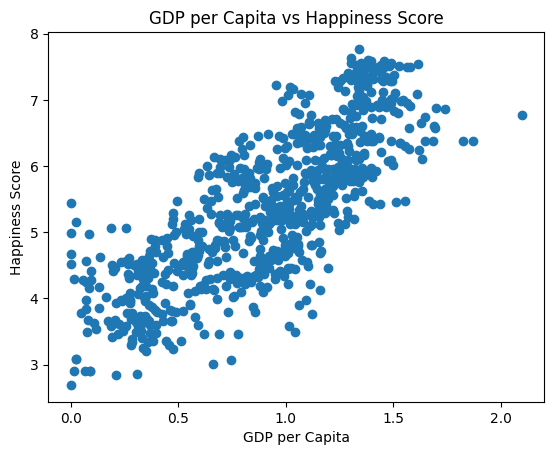

In [7]:
plt.scatter(happiness_df['GDP_per_Capita'], happiness_df['Happiness_Score'])
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('GDP per Capita vs Happiness Score')
plt.show()


We will use Pearson's correlation coefficient for this hypothesis test because we are dealing with continuous variables, and our previous scatter plot suggests that there is a linear relationship.

In [8]:
result = pearsonr(happiness_df['GDP_per_Capita'], happiness_df['Happiness_Score'])
print(f'P-value: {result.pvalue}')

P-value: 2.2137878354296676e-167


Since the p-value is less than our significance level of 0.05, we reject the null hypothesis, concluding that the GDP per Capita does have an effect on happiness score.

### Second Hypothesis (Correlation between Social Support and Happiness Score (2019)) <a id='second-hypothesis'></a>

Assume $\alpha = 0.05$.<br>
HO: There is no linear relationship between Social Support and Happiness Score (r = 0).<br>
HA: There is a linear relationship between Social Support and Happiness Score (r ≠ 0).

In [9]:
data_2019 = happiness_df[happiness_df['Year'] == 2019]
x = data_2019['Social_Support']
y = data_2019['Happiness_Score']

r_value, p_value = pearsonr(x, y)

print("Pearson correlation coefficient (r):", r_value)
print("P-value:", p_value)


Pearson correlation coefficient (r): 0.7770577880638644
P-value: 8.975119655182571e-33


Since the p-value is less than our significance level of 0.05, we reject the null hypothesis, concluding that the Social Support does have an effect on happiness score.

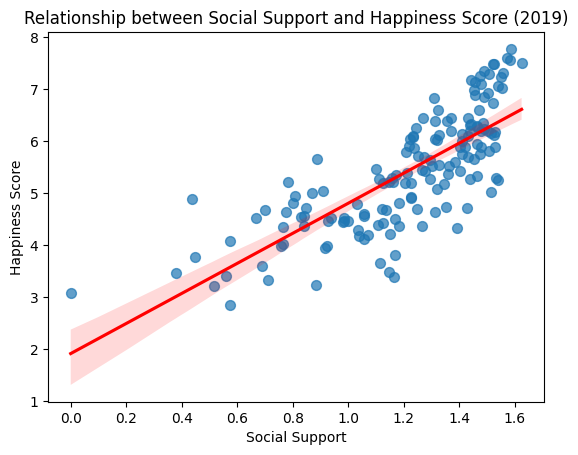

In [10]:
plt.figure()
sns.regplot(x='Social_Support', y='Happiness_Score', data=data_2019,
            scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Relationship between Social Support and Happiness Score (2019)')
plt.show()

### Third Hypothesis (Comparing Happiness Score between 2015 and 2019 (two sample t-test)) <a id='third-hypothesis'></a>

Assume $\alpha = 0.05$.<br>
HO: The mean Happiness Score in 2019 is equal to that in 2015. <br>
HA: The mean Happiness Score in 2019 is not equal to that in 2015.

In [11]:
data_2015 = happiness_df[happiness_df['Year'] == 2015]['Happiness_Score'].dropna()
data_2019 = happiness_df[happiness_df['Year'] == 2019]['Happiness_Score'].dropna()

t_stat, p_val = ttest_ind(data_2019, data_2015, equal_var=False)

print("Hypothesis Test: Comparing Happiness Score (2019 vs 2015)")
print("Null Hypothesis (H0): μ_2019 = μ_2015")
print("Alternative Hypothesis (H1): μ_2019 ≠ μ_2015")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Result: Reject H0. There is a statistically significant difference in Happiness Scores between 2019 and 2015.")
else:
    print("Result: Fail to reject H0. There is no statistically significant difference in Happiness Scores between 2019 and 2015.")

Hypothesis Test: Comparing Happiness Score (2019 vs 2015)
Null Hypothesis (H0): μ_2019 = μ_2015
Alternative Hypothesis (H1): μ_2019 ≠ μ_2015
T-statistic: 0.24609696456854885
P-value: 0.8057690323213097
Result: Fail to reject H0. There is no statistically significant difference in Happiness Scores between 2019 and 2015.


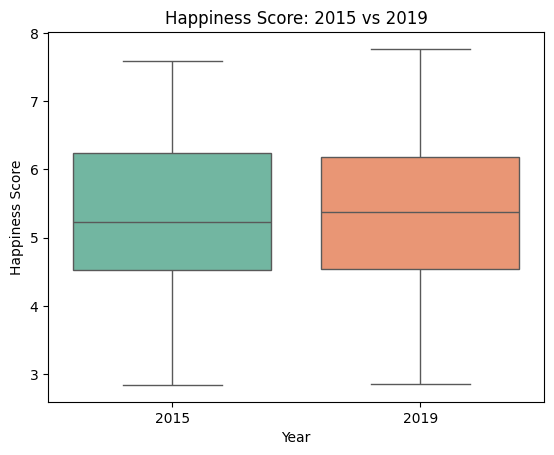

In [12]:
plt.figure()
sns.boxplot(x='Year', y='Happiness_Score', data=happiness_df[happiness_df['Year'].isin([2015, 2019])],
            hue='Year', palette='Set2')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score: 2015 vs 2019')
plt.legend([], [], frameon=False)
plt.show()

### Fourth Hypothesis (Effect of Region on Happiness Score) <a id='fourth-hypothesis'></a>

Assume $\alpha = 0.05$.<br>
HO: Does region not have an effect on the happiness score of a country.<br>
HA: Region does have an effect on the happiness score of a country.

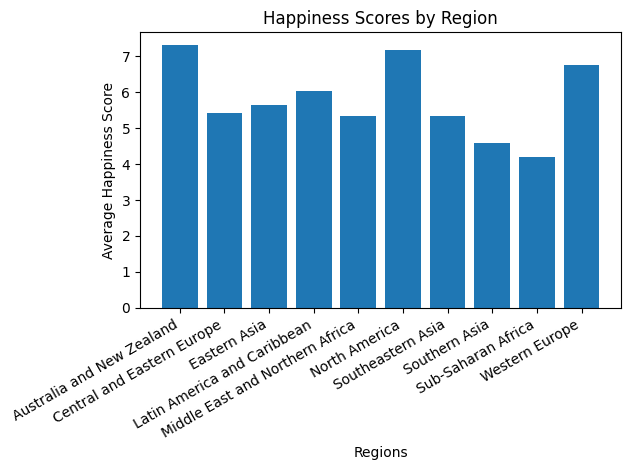

In [13]:
# First we split the countries by region
regions = []
mean_happiness_scores = []
raw_data = []
groups = happiness_df.groupby('Region')
# Then we calculate the mean happiness score per region
for (name, group_df) in groups:
    regions.append(name)
    raw_data.append(group_df['Happiness_Score'].values)
    mean_happiness_scores.append(group_df['Happiness_Score'].mean())
# Finally, we plot the results in a bar chart
plt.bar(regions, mean_happiness_scores)
plt.title('Happiness Scores by Region')
plt.xlabel('Regions')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=30, ha='right')  # Rotate and align right
plt.tight_layout()  # Prevent labels from getting cut off
plt.show()

Visually, it looks like the regions make a difference. Let us do an ANOVA test to make sure.

In [14]:
statistic, p_val = f_oneway(*raw_data)
print("P value: " + str(p_val))

P value: 9.82996034149784e-155


Since our p-value is less than 0.05, our One-Way ANOVA test confirms that region affects happiness score. Therefore we must reject our null hypothesis.

## Primary Analysis <a id='primary-analysis'></a>

### Feature Engineering <a id='feature-engineering'></a>

Prepare the data for machine learning techniques such as linear regression and random forest.

Also, splitting the data into training and testing data sets to test the accuracy of our model.

In [15]:
# Feature selection, one-hot encoding for the regions
df = pd.get_dummies(happiness_df.drop(columns=['Country', 'Year']), columns=['Region'], drop_first=True)

# Define feature and target
X = df.drop(columns=['Happiness_Score'])
y = df['Happiness_Score']

print("Feature columns:")
print(list(X.columns), "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature transformation - Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("First 5 rows of scaled training features:")
print(X_train_scaled_df.head(), "\n")

Feature columns:
['GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity', 'Region_Central and Eastern Europe', 'Region_Eastern Asia', 'Region_Latin America and Caribbean', 'Region_Middle East and Northern Africa', 'Region_North America', 'Region_Southeastern Asia', 'Region_Southern Asia', 'Region_Sub-Saharan Africa', 'Region_Western Europe'] 

First 5 rows of scaled training features:
   GDP_per_Capita  Social_Support  Healthy_Life_Expectancy   Freedom  \
0       -1.075712       -0.568918                -0.447769  0.046392   
1        0.362273       -0.508105                -0.707334 -0.585920   
2       -1.349629       -0.227789                -0.784352  0.079668   
3       -1.559257       -1.839905                -0.956361 -1.763833   
4        0.861324        0.444633                 1.711294 -0.024683   

   Perceptions_of_Corruption  Generosity  Region_Central and Eastern Europe  \
0                   1.099725   -0.30996

### Training and Testing Linear Regression Model <a id='training-and-testing-linear-regression-model'></a>

Training the regression model and then testing on the unseen data. Using R-Squared, mean absolute error, and mean squared error.

In [16]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
linear_y_pred = linear_regression.predict(X_test_scaled)

print("R-Squared Score:", round(r2_score(y_test, linear_y_pred), 4))
print("Mean Absolute Error:", round(mean_absolute_error(y_test, linear_y_pred), 4))
print("Mean Squared Error:", round(mean_squared_error(y_test, linear_y_pred), 4))

R-Squared Score: 0.8087
Mean Absolute Error: 0.3559
Mean Squared Error: 0.2107


### Training and Testing Random Forest Model <a id='training-and-testing-random-forest-model'></a>

In [17]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train) 
random_forest_y_pred = random_forest.predict(X_test)

print("Random Forest Regressor Evaluation:")
print("R-Squared Score:", round(r2_score(y_test, random_forest_y_pred), 4))
print("Mean Absolute Error:", round(mean_absolute_error(y_test, random_forest_y_pred), 4))
print("Mean Squared Error:", round(mean_squared_error(y_test, random_forest_y_pred), 4))

Random Forest Regressor Evaluation:
R-Squared Score: 0.8252
Mean Absolute Error: 0.3273
Mean Squared Error: 0.1925


#### Feature Importances <a id='feature-importances'></a>

In [18]:
# Get feature importances
importances = random_forest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top Features Driving Happiness Predictions:")
print(feature_importance_df)

Top Features Driving Happiness Predictions:
                                   Feature  Importance
0                           GDP_per_Capita    0.550767
2                  Healthy_Life_Expectancy    0.139495
3                                  Freedom    0.111161
1                           Social_Support    0.053171
8       Region_Latin America and Caribbean    0.051144
5                               Generosity    0.036696
4                Perceptions_of_Corruption    0.033180
7                      Region_Eastern Asia    0.007753
13               Region_Sub-Saharan Africa    0.005236
9   Region_Middle East and Northern Africa    0.003461
6        Region_Central and Eastern Europe    0.003157
12                    Region_Southern Asia    0.002790
11                Region_Southeastern Asia    0.000934
14                   Region_Western Europe    0.000910
10                    Region_North America    0.000145


## Visualization <a id='visualization'></a>

## Insights and Conclusions <a id='insights-and-conclusions'></a>